# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [852]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [853]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [854]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [855]:
# Create the Suburban city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [856]:
# Create the Rural city DataFrames.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [857]:
#  1. Get the total rides for each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count = urban_ride_count.sum()

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_ride_count.sum()

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_ride_count.sum()

In [858]:
urban_ride_count

1625

In [859]:
suburban_ride_count

625

In [860]:
rural_ride_count

125

In [861]:
# Combine total rides for all city types
total_rides_by_city = (urban_ride_count, suburban_ride_count, rural_ride_count)
total_rides_by_city

(1625, 625, 125)

In [862]:
# 2. Get the total number of drivers for each city type.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count = urban_driver_count.sum()

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_driver_count.sum()

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_driver_count.sum()

In [863]:
urban_driver_count

2405.0

In [864]:
suburban_driver_count

490.0

In [865]:
rural_driver_count

78.0

In [866]:
# Combine total number of drivers for each city type.
total_drivers_by_city = (urban_driver_count, suburban_driver_count, rural_driver_count)
total_drivers_by_city

(2405.0, 490.0, 78.0)

In [867]:
#  3. Get the total amount of fares for each city type
urban_total_fare = urban_cities_df.groupby(["city"]).sum()["fare"].sum()
urban_driver_count = urban_driver_count.sum()

suburban_total_fare = suburban_cities_df.groupby(["city"]).sum()["fare"].sum()
suburban_total_fare = suburban_total_fare.sum()

rural_total_fare = rural_cities_df.groupby(["city"]).sum()["fare"].sum()
rural_total_fare = rural_total_fare.sum()

In [868]:
urban_total_fare

39854.38000000001

In [869]:
suburban_total_fare

19356.33

In [870]:
rural_total_fare

4327.93

In [871]:
# Combine total amount of fares for each city type.
total_fare_by_city = (urban_total_fare, suburban_total_fare, rural_total_fare)
total_fare_by_city

(39854.38000000001, 19356.33, 4327.93)

In [872]:
#  4. Get the average fare per ride for urban cities by dividing the sum of all the fares by the total rides.
urban_avg_fare = urban_total_fare / urban_ride_count
urban_avg_fare

24.525772307692314

In [873]:
suburban_avg_fare = suburban_total_fare / suburban_ride_count
suburban_avg_fare

30.970128000000003

In [874]:
rural_avg_fare = rural_total_fare / rural_ride_count
rural_avg_fare

34.62344

In [875]:
# Combine the average fare per ride for all cities
avg_fare_by_city = (urban_avg_fare, suburban_avg_fare, rural_avg_fare)
avg_fare_by_city

(24.525772307692314, 30.970128000000003, 34.62344)

In [876]:
# 5. Get the average fare per driver for each city types\ by dividing the sum of all the fares by the total drivers.
urban_avg_driver_fare = urban_total_fare / urban_driver_count
urban_avg_driver_fare

16.57146777546778

In [877]:
suburban_avg_driver_fare = suburban_total_fare / suburban_driver_count
suburban_avg_driver_fare

39.50271428571429

In [878]:
rural_avg_driver_fare = rural_total_fare / rural_driver_count
rural_avg_driver_fare

55.48628205128205

In [879]:
# Combine the average driver fare for all cities
avg_driver_fare_by_city = (urban_avg_driver_fare, suburban_avg_driver_fare, rural_avg_driver_fare)
avg_driver_fare_by_city

(16.57146777546778, 39.50271428571429, 55.48628205128205)

In [880]:
#  6. Create a PyBer summary DataFrame PyBer summary DataFrame with all the data gathered from Steps 1-5, using the column names shown below:
# “Total Rides,” “Total Drivers,” “Total Fares,” “Average Fare per Ride,” “Average Fare per Driver by city type.
pyber_summary_df = pd.DataFrame(
        {"Total Rides": total_rides_by_city,
        "Total Drivers": total_drivers_by_city,
        "Total Fares": total_fare_by_city,
        "Average Fare per Ride": avg_fare_by_city,
        "Average Fare per Driver": avg_driver_fare_by_city})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,1625,2405.0,39854.38,24.525772,16.571468
1,625,490.0,19356.33,30.970128,39.502714
2,125,78.0,4327.93,34.623440,55.486282


In [881]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [882]:
#  8. Format the columns.
#Format the "Total Drivers" to have no decimal point.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:}".format)

# Format the "Total Fares" to have the comma for a thousands separator, a decimal separator and a "$".
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

#Format the "Avg Fare per Driver" to have no decimal point.
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

#Format the "Avg Fare per Driver" to have no decimal point.
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,1625,2405.0,"$39,854.38",$24.53,$16.57
1,625,490.0,"$19,356.33",$30.97,$39.50
2,125,78.0,"$4,327.93",$34.62,$55.49


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [883]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [884]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_df = pyber_data_df.groupby(["type", "date"]).sum()['fare']
sum_of_fares_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [885]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_of_fares_df = sum_of_fares_df.reset_index()

In [886]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get 
# the total fares for each type of city by the date. 
sum_of_fares_pivot = pd.pivot_table(sum_of_fares_df, values="fare", index=["date"], columns=["type"])
sum_of_fares_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [887]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
sum_of_fare_dates_df = sum_of_fares_pivot.loc['2019-1-1' : '2019-4-29']
sum_of_fare_dates_df

type,Rural,Suburban,Urban
date,,,


In [888]:
# Checking datatype
sum_of_fares_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 154.2+ KB


In [889]:
# 6. Set the "date" index to datetime datatype.
# df.index = pd.to_datetime(df.index)
sum_of_fares_pivot.index = pd.to_datetime(sum_of_fares_pivot.index)
sum_of_fares_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [890]:
# 7. Check that the datatype for the index is datetime using df.info()
sum_of_fares_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [891]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_of_fares_weekly_df = sum_of_fares_pivot.resample("W").sum()
sum_of_fares_weekly_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [892]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
# style.use('fivethirtyeigt')

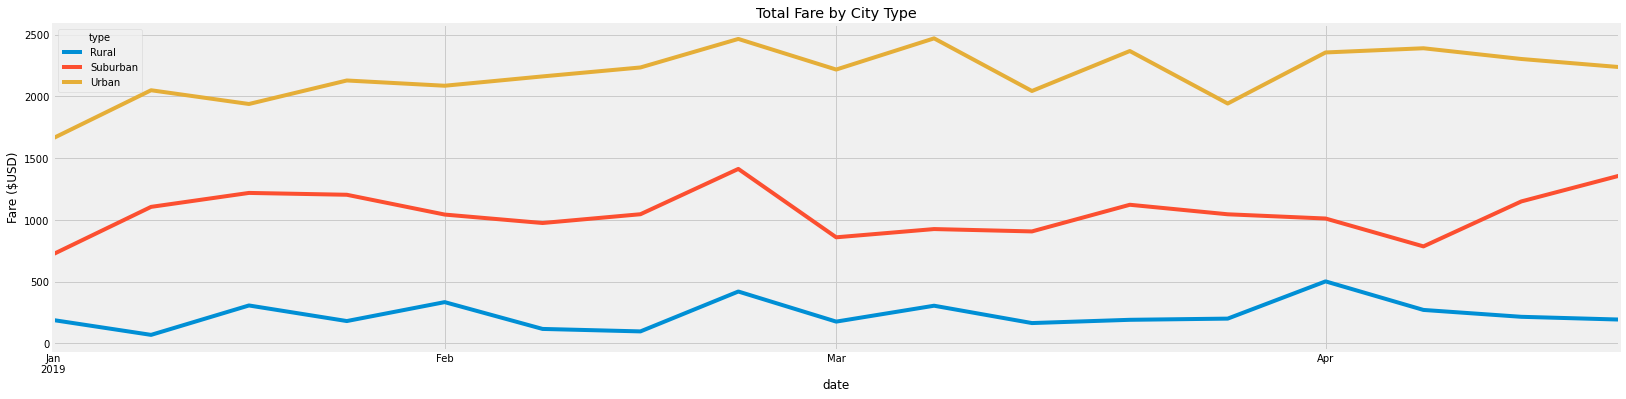

In [893]:
# Create the plot and add a label for the legend.
sum_of_fares_weekly = sum_of_fares_weekly_df.plot(figsize = (25,6))
sum_of_fares_weekly.set_title("Total Fare by City Type")
sum_of_fares_weekly.set_xlabel = ("")
sum_of_fares_weekly.set_ylabel('Fare ($USD)')
plt.xlim('01-01-2019', '04-28-2019')
plt.tight_layout
plt.savefig("analysis/PyBer_fare_summary.png")